In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from linearRegression import *
import plotly
import plotly.graph_objs as go

data = pd.read_csv("data/world-happiness-report-2017.csv", sep=',')
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)
input_param_name_1 = 'Economy..GDP.per.Capita.'
input_param_name_2 = 'Freedom'
output_param_name = 'Happiness.Score'

x_train = train_data[[input_param_name_1, input_param_name_2]].values
y_train = train_data[[output_param_name]].values

x_test = test_data[[input_param_name_1, input_param_name_2]].values
y_test = test_data[[output_param_name]].values

In [43]:
# plotly configure
mode = "markers"
marker = {
    'size':10,
    'opacity':1,
    'line': {
        'color': 'rgb(255,255,255)',
        'width':1
    }
}

x_train_ = x_train[:,0]
y_train_ = x_train[:,1]
z_train_ = y_train[:,0]
name_train_ = "training set"

plot_training_trace = go.Scatter3d(
    x=x_train_,
    y=y_train_,
    z=z_train_,
    name=name_train_,
    mode=mode,
    marker=marker
)

x_test_ = x_test[:,0]
y_test_ = x_test[:,1]
z_test_ = y_test[:,0]
name_test_ = "test set"
plot_test_trace = go.Scatter3d(
    x=x_test_,
    y=y_test_,
    z=z_test_,
    name=name_test_,
    mode=mode,
    marker=marker
)


plot_layout = go.Layout(
    title='Date Sets',
    scene={
        'xaxis': {'title': input_param_name_1},
        'yaxis': {'title': input_param_name_2},
        'zaxis': {'title': output_param_name} 
    },
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

plot_data = [plot_training_trace, plot_test_trace]
plot_figure = go.Figure(data=plot_data, layout=plot_layout)
plotly.offline.iplot(plot_figure)

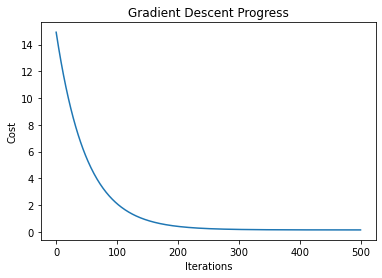

In [44]:
lr = LinearRegression()
lr.fit(x_train, y_train, alpha = 0.01, num_iters=500)
plt.plot(range(len(lr.cost_hist)), lr.cost_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
plt.show()

In [57]:
# 绘制决策边界
predictions_num = 10
x_min = x_train[:, 0].min();
x_max = x_train[:, 0].max();
y_min = x_train[:, 1].min();
y_max = x_train[:, 1].max();

x_axis = np.linspace(x_min, x_max, predictions_num)
y_axis = np.linspace(y_min, y_max, predictions_num)

x_y_mesh = np.meshgrid(x_axis, y_axis) # type -> list
x_predictions = x_y_mesh[0].flatten()
y_predictions = x_y_mesh[1].flatten()

features = np.array([x_predictions, y_predictions]).T
# features
z_predictions = lr.predict(features).flatten()  # 预测值是二维的，转为一维
# z_predictions

In [58]:
name_pre_ = "predictions plane"
plot_predictions_trace = go.Scatter3d(
    x=x_predictions,
    y=y_predictions,
    z=z_predictions,
    name=name_pre_,
    mode=mode,
    marker={'size':1,},
    opacity=0.8,
    surfaceaxis=2,
)
plot_data = [plot_training_trace, plot_test_trace, plot_predictions_trace]
plot_figure = go.Figure(data=plot_data, layout=plot_layout)
plotly.offline.iplot(plot_figure)